In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)

In [2]:
%cd ~/cdv/

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
dataset = 'mptrj'

import json
with open(f'precomputed/{dataset}/raw_metadata.json', 'r') as f:
    metadata = json.load(f)
    
df = pd.read_feather(f'precomputed/{dataset}/energy_data.feather')
df

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,energy,total_energy
0,0.0,256.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029157,-7.930647
1,0.0,0.0,0.0,4.0,48.0,16.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.101912,-7.337653
2,0.0,0.0,0.0,0.0,32.0,0.0,0.0,30.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.099082,-6.341242
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.080887,-4.286985
4,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.107602,-5.164886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580390,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.831439,-6.651516
1580391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.198224,-7.189344
1580392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.256883,-7.541301
1580393,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.501634,-2.006537


In [4]:
from pymatgen.core import Element

symbols = [Element.from_Z(z).symbol for z in metadata['atomic_numbers'][1:]]

df.columns = ['0', *symbols, 'energy', 'total_energy']
df

,0,C,Cl,Li,O,P,Sb,Mg,Fe,Cu,...,Pa,Lu,Pm,Xe,Ac,Ne,He,Ar,energy,total_energy
0,0.0,256.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029157,-7.930647
1,0.0,0.0,0.0,4.0,48.0,16.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.101912,-7.337653
2,0.0,0.0,0.0,0.0,32.0,0.0,0.0,30.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.099082,-6.341242
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.080887,-4.286985
4,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.107602,-5.164886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580390,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.831439,-6.651516
1580391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.198224,-7.189344
1580392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.256883,-7.541301
1580393,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.501634,-2.006537


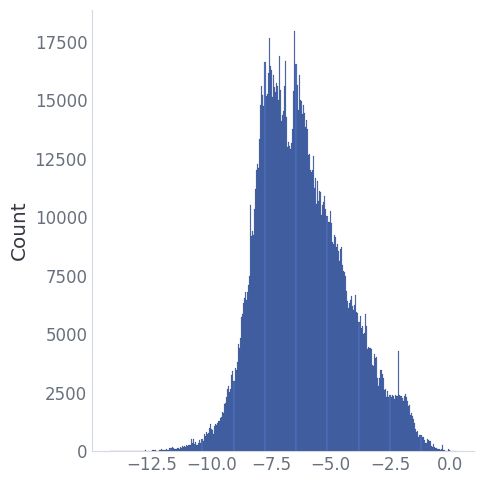

In [5]:
num_atoms = df.iloc[:, :-2].sum(axis=1)
y = df['total_energy'].values

X = df.iloc[:, :-2]

sns.displot(y)

In [6]:
import os
os.environ['KERAS_BACKEND'] = 'jax'

import keras
from keras import layers
from keras import ops

import tensorflow_probability.substrates.jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

y_global = y
global_shift = np.median(y_global)
global_scale = np.mean(np.abs(y_global - global_shift))
print(global_shift, global_scale)
print(tfd.Laplace(global_shift, global_scale).log_prob(y_global).mean())

# global_shift = 0
# global_scale = 1
transform = ops.softplus
inv_transform = lambda x: ops.log(ops.expm1(x))

intercept = inv_transform(1)
# transform = ops.exp
# inv_transform = ops.log


class SpeciesEnergyModel(keras.Model):
    """Models mean and MAE of each element's energy."""
    def __init__(self):
        super().__init__()
        self.shift = layers.Dense(1, kernel_initializer='zeros', use_bias=False, kernel_regularizer=keras.regularizers.l2(1e-6))
        self.scale = layers.Dense(1, kernel_initializer='zeros', use_bias=False, kernel_regularizer=keras.regularizers.l2(1e-6))
        self.global_shift = self.add_weight((1,), lambda shape, dtype: global_shift * keras.initializers.Ones()(shape, dtype), trainable=True)
        self.global_scale = self.add_weight((1,), lambda shape, dtype: inv_transform(global_scale) * keras.initializers.Ones()(shape, dtype), trainable=True)

        self.built = True

    def predict_dist(self, X):
        num_atoms = ops.sum(X, axis=-1, keepdims=False)
        shift = self.shift(X).reshape(-1) / num_atoms
        scale = transform(self.scale(X).reshape(-1) + intercept) / num_atoms
        # scale = 1
        return tfd.Laplace(shift + self.global_shift, scale * transform(self.global_scale))

    def call(self, Xy):
        X, y = Xy
        dist = self.predict_dist(X)
        return -dist.log_prob(y.reshape(-1))
    

mod = SpeciesEnergyModel()
out = mod([X[:64], y[:64]])
print(out.shape, out.reshape(-1).round(5))

2024-09-20 12:47:34.943976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 12:47:34.955528: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 12:47:34.959053: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-20 12:47:35.559043: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


-6.41029746890625 1.4696701343405794


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/home/nmiklaucic/minicon

-2.078185
(64,) [ 2.7685196e+02  4.2233200e+01 -7.3539995e-02  7.3679855e+01
  3.7882618e+01  7.8640175e+01  1.4011980e+01  4.1599838e+01
  1.2528700e+01  1.1933940e+01  3.4672379e+01  3.5374279e+01
  7.6902399e+00  1.8579279e+01  1.4212979e+01  1.4054790e+01
  1.5712299e+00  7.8017097e+00  1.9796200e+00  5.7013898e+00
  3.1115759e+01  1.6156990e+01  1.4879649e+01  4.0778599e+00
  4.2593799e+00  1.2485200e+01  3.1186500e+00  2.1235900e+00
  6.9253197e+00  1.0344399e+00  1.0423200e+00  3.8431235e+02
  4.2206398e+01  5.0132198e+00  3.3263020e+01  5.2657959e+01
  2.9441700e+00  4.0903919e+01  2.0891119e+01  2.3710089e+01
  5.0479488e+01  3.4708988e+01  3.5372799e+01  7.6874399e+00
  1.8356220e+01  1.4211820e+01  1.5585449e+01  1.6956999e+00
  7.8069696e+00  4.2426380e+01  7.0035996e+00  1.1323440e+01
  1.6176079e+01  2.0033609e+01  1.3251590e+01  4.2546997e+00
  1.2484079e+01  3.0791199e+00  1.1247060e+01  3.7461598e+00
  1.0389600e+00  1.0315900e+00  3.8427509e+02  4.2170898e+01]


Epoch 1/5
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.1731 - val_loss: 0.8562
Epoch 2/5
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8385 - val_loss: 0.8493
Epoch 3/5
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8350 - val_loss: 0.8365
Epoch 4/5
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8325 - val_loss: 0.8375
Epoch 5/5
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8274 - val_loss: 0.8324


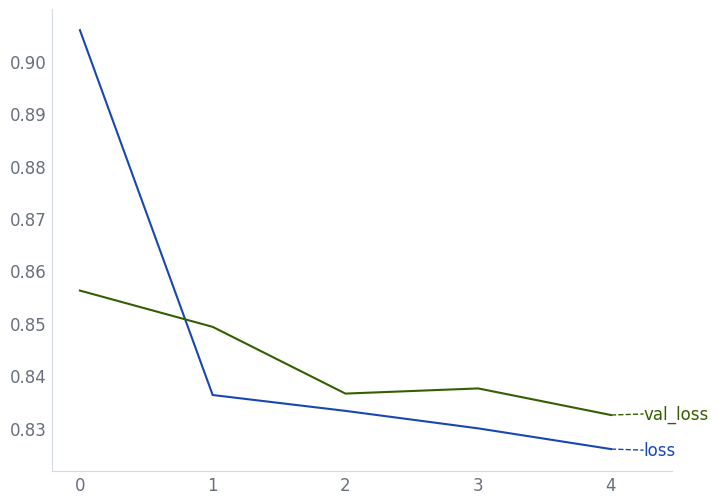

In [24]:
from keras.optimizers.schedules import PolynomialDecay

def fit(epochs=5, valid_split=0.2, batch_size=512):
    mod = SpeciesEnergyModel()
    mod([X[:64], y[:64]])

    steps_in_epoch = round((X.shape[0] * (1 - valid_split)) / (batch_size) + 0.5)

    decay_steps = steps_in_epoch * epochs

    def log_prob_loss(y_true, y_pred):
        return y_pred

    mod.compile(optimizer=keras.optimizers.Adam(
        learning_rate=PolynomialDecay(3e-2, decay_steps, end_learning_rate=1e-6), 
        global_clipnorm=3.0), loss=log_prob_loss)

    history = mod.fit([X, y], y * 0, batch_size=batch_size, epochs=epochs, validation_split=valid_split)

    pd.DataFrame(history.history).plot()
    rp.line_labels()
    
    return mod

mod = fit()

Epoch 1/5
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.1209 
Epoch 2/5
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 3s 945us/step - loss: 0.8406
Epoch 3/5
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 3s 922us/step - loss: 0.8355
Epoch 4/5
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 3s 922us/step - loss: 0.8321
Epoch 5/5
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 3s 924us/step - loss: 0.8287


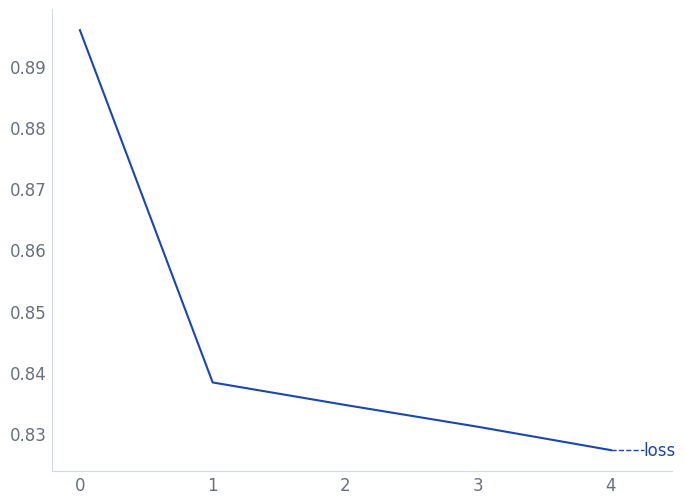

In [25]:
mod = fit(valid_split=0)

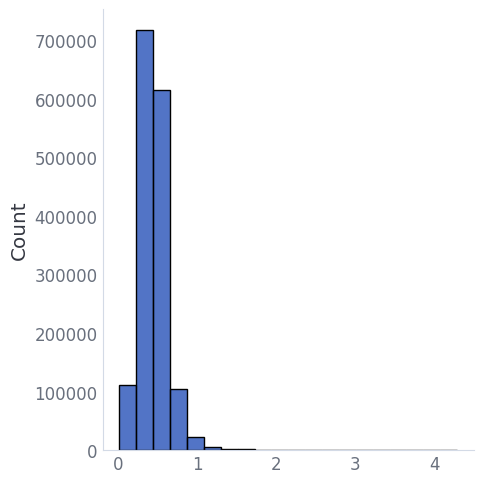

In [26]:
sns.displot(mod.predict_dist(X).scale, bins=30)

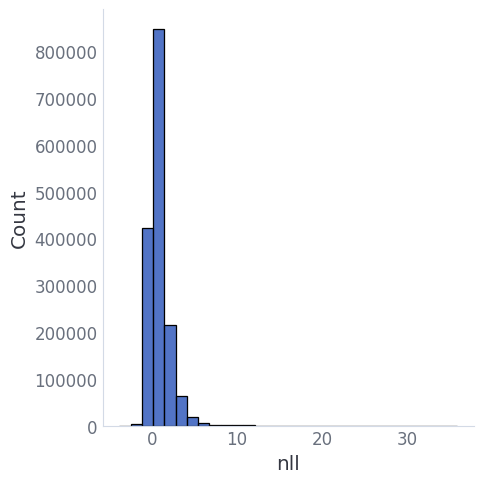

In [30]:
dists = mod.predict_dist(X)
df['loc'] = dists.loc
df['scale'] = dists.scale
df['resid'] = dists.loc-y
df['nll'] = -dists.log_prob(y.reshape(-1))

sns.displot(df['nll'], bins=30)
# xx = jnp.linspace(-10, 10, 1000)
# plt.plot(xx, jnp.exp(-jnp.abs(xx)))

In [31]:
worst = df.sort_values('resid').tail(5)
worst.loc[:, (worst != 0).any(axis=0)]

,Xe,energy,total_energy,loc,scale,resid,nll
651829,1.0,-0.035751,-0.035751,9.926848,4.290196,9.962599,4.471658
209608,2.0,-0.018008,-0.036016,9.926848,3.803691,9.962865,4.648382
651457,1.0,-0.036172,-0.036172,9.926848,4.290196,9.963020,4.471756
211344,2.0,-0.018088,-0.036175,9.926848,3.803691,9.963023,4.648423
651798,1.0,-0.036481,-0.036481,9.926848,4.290196,9.963329,4.471828


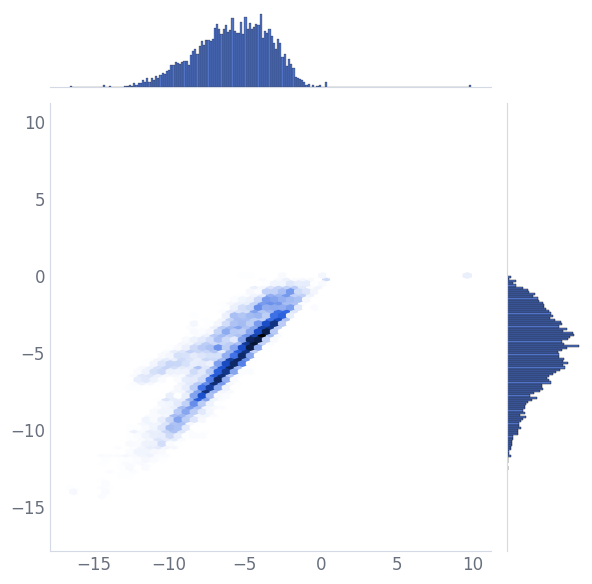

In [32]:
def show_error(mask):
    g = sns.jointplot(x=mod.predict_dist(X[mask]).loc.reshape(-1), y=y[mask], kind='hex')
    lo1, hi1 = g.ax_joint.get_xlim()
    lo2, hi2 = g.ax_joint.get_ylim()
    lim = (min(lo1, lo2), max(hi1, hi2))
    g.ax_joint.set_xlim(*lim)
    g.ax_joint.set_ylim(*lim)

show_error(num_atoms <= 4)

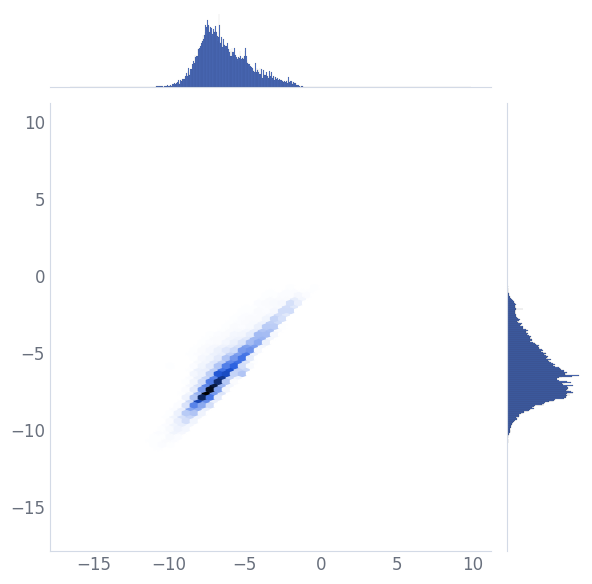

In [33]:
show_error(num_atoms >= 4)

In [34]:
data = {
    'scale': mod.scale.get_weights()[0].reshape(-1),
    'shift': mod.shift.get_weights()[0].reshape(-1),
    'global_scale': mod.global_scale.value,
    'global_shift': mod.global_shift.value,
}

@np.vectorize
def get_z(s):
    return Element(s).Z if s != '0' else 1000

atomic_scale = pd.Series(transform(data['scale'] + intercept).tolist(), index=df.columns[:len(data['scale'])])
atomic_scale.sort_values()

He    0.729227
In    0.985136
Cr    0.985692
V     0.993859
Mn    0.994780
        ...   
Ne    1.766344
Ar    2.087495
Kr    2.743739
Tc    2.765819
Xe    2.872889
Length: 90, dtype: float64

In [35]:
atomic_energies = pd.Series((data['shift'] + data['global_shift']).tolist(), index=atomic_scale.index).sort_index(key=get_z).iloc[:-1]
atomic_energies

H     -3.508069
He    -2.455259
Li    -3.116730
Be    -4.110614
B     -7.277860
        ...    
Th    -9.353853
Pa   -10.506454
U    -12.569285
Np   -13.075302
Pu   -14.243183
Length: 89, dtype: float64

In [36]:
import json
with open('data/sevennet_stats.json', 'r') as f:
    sevenstats = json.load(f)

energy_comp = pd.DataFrame({'new': atomic_energies.values.round(3), 
                            'scale': atomic_scale.sort_index(key=get_z).iloc[:-1].values.round(3), 
                            'seven': sevenstats['atomic_energies']}, index=atomic_energies.index)

energy_comp['abs_diff'] = energy_comp.eval('abs(new - seven)')
energy_comp.sort_values('abs_diff', ascending=False)

,new,scale,seven,abs_diff
Kr,-0.035,2.744,6.767,6.802
Ne,-5.296,1.766,0.000,5.296
Ar,-4.465,2.087,-0.063,4.402
W,-12.584,1.004,-9.355,3.229
Pm,-5.411,1.283,-7.592,2.181
...,...,...,...,...
Xe,9.927,2.873,9.847,0.080
Ge,-4.651,1.014,-4.708,0.057
C,-8.442,1.124,-8.406,0.036
Bi,-3.411,1.013,-3.439,0.028


<Axes: xlabel='new', ylabel='seven'>

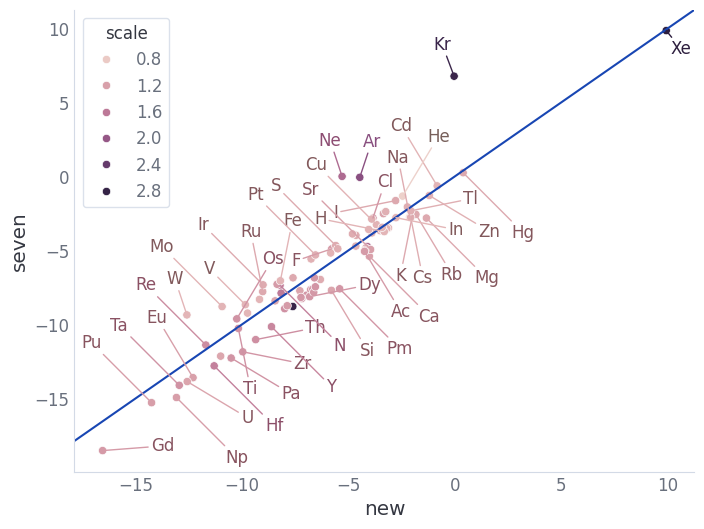

In [37]:
sns.scatterplot(energy_comp, x='new', y='seven', hue='scale')
plt.axline((0, 0), slope=1)
rp.scatter_labels(energy_comp.index)

In [38]:
from facet.utils import save_pytree


save_pytree(data, f'precomputed/{dataset}/stats.mpk')

In [39]:
from facet.utils import load_pytree


load_pytree(f'precomputed/{dataset}/stats.mpk')

{'scale': array([ 0.00000000e+00,  1.89549133e-01,  4.53346431e-01,  4.49790135e-02,
         3.75138193e-01,  1.27673388e-01,  4.64272909e-02,  1.64545670e-01,
        -5.05935634e-03,  4.57815751e-02,  8.29174578e-01,  3.31764482e-02,
         1.77147537e-01,  2.03250926e-02, -8.26982781e-03, -9.73202661e-03,
        -2.27308013e-02,  1.47551343e-01,  4.21401381e-01,  2.20348593e-02,
         1.03225440e-01,  1.15654968e-01,  3.09726089e-01,  1.75822169e-01,
         4.78738815e-01,  3.45937818e-01,  2.46268567e-02,  7.08727241e-01,
         2.32076466e-01,  2.84442753e-01,  5.84474392e-02,  4.92529012e-02,
         2.09222455e-02,  5.16091362e-02,  2.62653798e-01,  2.93819219e-01,
         7.18794048e-01,  1.98440447e-01,  6.32008314e-01,  1.02724075e-01,
         1.19027263e-02,  1.43163735e-02,  5.24571657e-01,  4.40047950e-01,
         2.37130806e-01,  3.62891406e-01,  1.84054658e-01,  1.10711306e-01,
         2.37276003e-01,  1.74090013e-01,  1.17926799e-01, -2.14786734e-04,
   

In [40]:
from facet.data.metadata import DatasetMetadata

kk = jnp.array(metadata['r_max_counts'])

ds_metadata = DatasetMetadata(
    dataset_name=dataset,
    supported_targets=('energy',),
    batches_per_group=jnp.array(metadata['batches_per_group'], dtype=jnp.uint32),
    batch_num_atoms=metadata['num_atoms'],
    nearest_k=metadata['k'],
    batch_num_graphs=metadata['num_batch'],
    shift_energy=data['global_shift'].item(),
    scale_energy=data['global_scale'].item(),
    atomic_numbers=jnp.array(metadata['atomic_numbers'], dtype=jnp.uint8),
    atomwise_scale_energy=jnp.array(data['scale']),
    atomwise_shift_energy=jnp.array(data['shift']),
    r_max_quantile_r=jnp.array(metadata['r_max_bins']),
    r_max_quantile_k=kk / kk.sum(axis=-1, keepdims=True)
)

ds_metadata

DatasetMetadata(dataset_name='mptrj', supported_targets=('energy',), batches_per_group=Array([ 906, 1425, 1409, 1425, 1438, 1440, 1436, 1440, 1422, 1430, 1445,
       1492, 1398, 1439, 1425, 1443, 1465, 1413, 1397, 1394, 1425, 1475,
       1492, 1430, 1388, 1445, 1411, 1460, 1491, 1433, 1451, 1420, 1464,
       1427, 1402, 1430], dtype=uint32), batch_num_atoms=32, nearest_k=16, batch_num_graphs=32, shift_energy=-6.084603309631348, scale_energy=1.2389345169067383, atomic_numbers=Array([ 0,  6, 17,  3,  8, 15, 51, 12, 26, 29, 21, 31, 37, 83, 25, 23, 24,
       16, 62, 32, 46, 34, 70, 19, 60,  9, 28,  7, 14, 20, 30, 52, 42, 27,
       56, 38, 72, 41, 39, 47, 48, 50, 90, 40, 92, 58, 45, 55, 13, 53, 33,
       82,  5, 22, 49, 11, 35, 78, 69, 73, 57, 93,  1, 94, 66, 77, 81,  4,
       74, 64, 63, 75, 43, 59, 79, 44, 68, 80, 65, 67, 76, 36, 91, 71, 61,
       54, 89, 10,  2, 18], dtype=uint8), atomwise_shift_energy=Array([  0.        ,  -2.3578465 ,   2.2394383 ,   2.9678729 ,
        -2.2638

In [41]:
save_pytree(ds_metadata, f'precomputed/{dataset}/metadata.mpk')